'memory', 'height', 'width', 'depth', 'square',  'video_resolution_v', 'video_resolution_h', 'screen_resolution_h', 'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight, 'is_5G', 'Год релиза', 'Поддержка быстрой зарядки' , 'battery_bin', 'Поддержка беспроводной зарядки', 
'brand', 'Гарантия предоставляется', 'Страна', 'Количество основных камер (шт)', 'Сумма Мпикс основной камеры', 'Материал корпуса'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import ast
import numpy as np
import seaborn as sns
import warnings
import statsmodels.api as sm

warnings.filterwarnings("ignore")

: 

In [579]:
df = pd.read_csv('../mvideo_features.csv')
df = df.drop_duplicates(subset=df.columns.difference(['product_id']), keep='first').reset_index(drop=True)

df.head(3)
columns_needed = ['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза', 'Количество ядер', 'Технология экрана', 'Разрешение экрана', 'Экран',
                  "Степень защиты", "Разрешение видеосъемки", "Цифровой зум (x)", "Оперативная и встроенная память", 
                  "Вес (г)", "Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", "Мощность блока питания (Вт)", "Встроенная память (ROM) (ГБ)", 
                  'Диагональ дополнительного экрана (")','Разрешение по горизонтали в развернутом виде (Пикс)',
                  "Разрешение по вертикали в развернутом виде (Пикс)",'Диагональ в развернутом виде (")',
                  "Разрешение дополнительного экрана по вертикали (Пикс)","Разрешение дополнительного экрана по горизонтали (Пикс)", 
                  'Поддержка быстрой зарядки', 'Емкость аккумулятора (мАч)', 'Поддержка беспроводной зарядки', 'brand', 'Встроенный искусственный интеллект',
                  'Количество фронтальных камер (шт)', 'Количество основных камер (шт)', 'Состояние', 'Безрамочный', 'Материал корпуса']
target = ['salePrice']

df1 = df[columns_needed + target + ['product_id', 'name']]
df1[["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)"]].head(3)
def choose(row):
    if '0' in str(row['memory2']):
        return row['memory2']
    if '0' in str(row['memory3']):
        return row['memory3']
    return row['memory4']

def get_memory(x):
    if type(x) == float:
        return x
    if type(x) == str:
        f = re.findall(r'[0-9]+', x)
        if type(f[-1]) == str:
            return float(f[-1])
    return x
def get_memory_from_name(x):
    if 'TB' in x:
        f = re.findall(r'[0-9/]+TB', x)
        return get_memory(f[0]) * 1024.0 if len(f) > 0 else np.nan
    if 'GB' in x:
        f = re.findall(r'[0-9/]+GB', x)
        return get_memory(f[0]) if len(f) > 0 else np.nan
    return np.nan

df1['memory2'] = df1["Оперативная и встроенная память"].apply(lambda x: get_memory(x))
df1['memory3'] = df1["Встроенная память (ROM) (ГБ)"].apply(lambda x: get_memory(x))
df1['memory4'] = df1["name"].apply(lambda x: get_memory_from_name(x))
df1['memory'] = df1.apply(choose, axis=1)

df1 = df1.drop(columns=["Оперативная и встроенная память", "Встроенная память (ROM) (ГБ)", 'memory2', 'memory3', 'memory4'])
def get_height(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return x

def get_width(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return x


def get_depth(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if len(f) < 3:
            return np.nan
        if type(f[2]) == str:
            return float(f[2])
    return np.nan

def choose_h(row):
    if row['height1'] !=  np.nan:
        return row['height1']
    return row['height2']
def choose_w(row):
    if row['width1'] !=  np.nan:
        return row['width1']
    return row['width2']
def choose_d(row):
    if row['depth1'] !=  np.nan:
        return row['depth1']
    return row['depth2']


df1['height1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_height(x))
df1['width1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_width(x))
df1['depth1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_depth(x))

df1['height2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_height(x))
df1['width2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_width(x))
df1['depth2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_depth(x))

df1['height'] = df1.apply(choose_h, axis=1)
df1['width'] = df1.apply(choose_w, axis=1)
df1['depth'] = df1.apply(choose_d, axis=1)
df1['square'] = df1['height'] * df1['width']
df1['volume'] = df1['height'] * df1['width'] * df1['depth']

df1 = df1.drop(columns=["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", 
                        'height1', 'height2', 'width1', 'width2', 'depth1', 'depth2'])

def get_res_0(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return 720.0

def get_res_1(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return 720.0



df1['video_resolution_v'] = df1["Разрешение видеосъемки"].apply(lambda x: get_res_1(x))
df1['video_resolution_h'] = df1["Разрешение видеосъемки"].apply(lambda x: get_res_0(x))

df1['screen_resolution_h'] = df1["Разрешение экрана"].apply(lambda x: get_res_0(x))
df1['screen_resolution_v'] = df1["Разрешение экрана"].apply(lambda x: get_res_1(x))

df1['screen_diag'] = df1["Экран"].apply(lambda x: np.nan if get_res_0(x) > 9.0 else get_res_0(x))


df1 = df1.drop(columns=["Разрешение видеосъемки", "Разрешение экрана", "Экран"])

def get_dust_IP(x):
    if type(x) is str and x[:2] == 'IP':
        if x[2] == 'X':
            return np.nan
        return int(x[2])
    return 0.0

def get_water_IP(x):
    if type(x) is str and  x[:2] == 'IP':
        if x[3] == 'X':
            return np.nan
        return int(x[3])
    return 0.0


df1['dust_IP'] = df1["Степень защиты"].apply(lambda x: get_dust_IP(x))
df1['water_IP'] = df1["Степень защиты"].apply(lambda x: get_water_IP(x))

df1 = df1.drop(columns=["Степень защиты"])

df1['zoom'] = df1['Цифровой зум (x)']
df1['weight'] = df1['Вес (г)']
df1['kernel_cnt'] = df1['Количество ядер']
df1['screen_technology'] = df1['Технология экрана']
df1['power'] = df1['Мощность блока питания (Вт)']

metals = ['металл', 'титан', 'алюм', 'сталь']
df1['frame_has_metal'] = df1['Материал корпуса'].apply(lambda x: any(metal in x.lower() for metal in metals) if type(x) == str else False).astype('int')
df1['frame_has_plastic'] = df1['Материал корпуса'].apply(lambda x: 'пластик' in x.lower() if type(x) == str else False ).astype('int')

df1 = df1.drop(columns=["Цифровой зум (x)", "Вес (г)", "Количество ядер", "Технология экрана", "Мощность блока питания (Вт)", "Материал корпуса"])

In [580]:
data = df1

In [581]:
data['Состояние'].unique()

array(['новый', nan, 'восстановленный'], dtype=object)

In [582]:
print(data['Емкость аккумулятора (мАч)'].isna().sum())

236


In [583]:
iphone_battery_capacity = {
    'iPhone 16 Pro': 3355,
    'iPhone 16 Pro Max': 4676,
    'iPhone 16': 3561,
    'iPhone 16 Plus': 4006,
    'iPhone 15 Pro': 3274,
    'iPhone 15 Pro Max': 4422,
    'iPhone 15': 3349,
    'iPhone 15 Plus': 4383,
    'iPhone 14 Pro': 3200,
    'iPhone 14 Pro Max': 4323,
    'iPhone 14': 3279,
    'iPhone 14 Plus': 4325,
    'iPhone 13 Pro': 3095,
    'iPhone 13 Pro Max': 4352,
    'iPhone 13': 3227,
    'iPhone 13 mini': 2406,
    'iPhone SE (2022)': 2018,
    'iPhone SE (2020)': 1821,
    'iPhone 12 Pro': 2815,
    'iPhone 12 Pro Max': 3687,
    'iPhone 12': 2815,
    'iPhone 12 mini': 2227,
    'iPhone 11 Pro': 3046,
    'iPhone 11 Pro Max': 3969,
    'iPhone 11': 3110,
    'iPhone XR': 2942,
    'iPhone XS': 2658,
    'iPhone XS Max': 3174,
    'iPhone X': 2716,
    'iPhone 8 Plus': 2691,
    'iPhone 8': 1821
}

# Нормализуем словарь: убираем "iPhone ", приводим к нижнему регистру
normalized_battery_capacity = {
    model.lower().replace('iphone ', '').strip(): capacity
    for model, capacity in iphone_battery_capacity.items()
}
# print(normalized_battery_capacity)

def fill_iphone_capacity(row):
    if pd.isna(row['Емкость аккумулятора (мАч)']):
        # Приводим серию к тому же формату
        series = str(row['Серия']).lower().replace('iphone', '').replace('apple', '').strip()
        # print(series)
        return normalized_battery_capacity.get(series, row['Емкость аккумулятора (мАч)'])
    return row['Емкость аккумулятора (мАч)']

data['Емкость аккумулятора (мАч)'] = data.apply(fill_iphone_capacity, axis=1)


In [584]:
data[['Емкость аккумулятора (мАч)', 'brand', 'Серия']][data.brand == 'Apple']

,Емкость аккумулятора (мАч),brand,Серия
0,3227.0,Apple,iPhone 13
3,3355.0,Apple,iPhone 16 Pro
10,4676.0,Apple,iPhone 16 Pro Max
11,4676.0,Apple,iPhone 16 Pro Max
12,4676.0,Apple,iPhone 16 Pro Max
...,...,...,...
919,4422.0,Apple,iPhone 15 Pro Max
921,3355.0,Apple,Apple iPhone 16 Pro
924,3274.0,Apple,iPhone 15 Pro
925,3355.0,Apple,iPhone 16 Pro


In [585]:
print(data['Емкость аккумулятора (мАч)'].isna().sum())

4


In [586]:
data.columns

Index(['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза',
       'Диагональ дополнительного экрана (")',
       'Разрешение по горизонтали в развернутом виде (Пикс)',
       'Разрешение по вертикали в развернутом виде (Пикс)',
       'Диагональ в развернутом виде (")',
       'Разрешение дополнительного экрана по вертикали (Пикс)',
       'Разрешение дополнительного экрана по горизонтали (Пикс)',
       'Поддержка быстрой зарядки', 'Емкость аккумулятора (мАч)',
       'Поддержка беспроводной зарядки', 'brand',
       'Встроенный искусственный интеллект',
       'Количество фронтальных камер (шт)', 'Количество основных камер (шт)',
       'Состояние', 'Безрамочный', 'salePrice', 'product_id', 'name', 'memory',
       'height', 'width', 'depth', 'square', 'volume', 'video_resolution_v',
       'video_resolution_h', 'screen_resolution_h', 'screen_resolution_v',
       'screen_diag', 'dust_IP', 'water_IP', 'zoom', 'weight', 'kernel_cnt',
       'screen_technology', 'power

In [587]:
data['standarts'] = data['Поддержка стандартов'].apply(lambda x: re.split(r'[ /]', str(x)))
data['is_5G'] = data['standarts'].apply(lambda x: '5G' in x if isinstance(x, list) else False)
data['is_5G'] = data['is_5G'].astype(int)
data['year'] = np.where(data['Год релиза'] != 2028, data['Год релиза'], 2023)
data['quick_charge'] = (data['Поддержка быстрой зарядки'] == 'Да').astype(int)
# data.rename(columns={'Поддержка быстрой зарядки' : 'quick_charge'}, inplace=True)
data['wireless_charging'] = (data['Поддержка беспроводной зарядки'] == 'Да').astype(int)
data['ai'] = (data['Встроенный искусственный интеллект'] == 'Да').astype(int)
bin_size = 100
mean_battery = data['Емкость аккумулятора (мАч)'].mean()
data['battery_bin'] = (
	pd.to_numeric(data['Емкость аккумулятора (мАч)'], errors='coerce')
	.fillna(mean_battery)
	.apply(lambda x: int(x) // bin_size * bin_size if not pd.isna(x) else np.nan)
)
data['frameless'] = (data['Безрамочный'] == 'Да').astype(int)
data['used'] = (data['Состояние'] == 'восстановленный').astype(int)
data = data.rename(columns={'Емкость аккумулятора (мАч)' : 'battery', 
                            'Количество основных камер (шт)' : 'main_cams',
                            })

data['dop_screen'] = (data['Диагональ дополнительного экрана (")'].isna()).astype(int)
data['is_fold'] = (data['Диагональ в развернутом виде (")'].isna()).astype(int)

In [588]:
def get_year(x):
    if x >= 2022.0:
        return int(x)
    return 2022

data['year'] = data['year'].apply(lambda x: get_year(x))
# data = data[data['year'] != '2028']
# data = data.drop(columns=['Год релиза'])

Модель 1

In [589]:
features = ['memory', 'height', 'width', 'depth', 'square',  
            'video_resolution_v', 'video_resolution_h', 'screen_resolution_h', 
            'frame_has_metal', 'frame_has_plastic',
            'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight']

target = 'salePrice'
X = data[features]
y = data[target]
X_filled = X.fillna(X.mean())
X_filled = sm.add_constant(X_filled)
model_sm = sm.OLS(y, X_filled).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     130.0
Date:                Tue, 06 May 2025   Prob (F-statistic):          2.56e-214
Time:                        16:17:37   Log-Likelihood:                -10865.
No. Observations:                 929   AIC:                         2.176e+04
Df Residuals:                     913   BIC:                         2.184e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.094e+05   3

'is_5G', 'Год релиза', 'Поддержка быстрой зарядки' , 'battery_bin', 'Поддержка беспроводной зарядки', 
'brand', 'Гарантия предоставляется', 'Страна', 'Количество основных камер (шт)', 'Сумма Мпикс основной камеры', 'Материал корпуса'

Модель 2

In [590]:
data.columns

Index(['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза',
       'Диагональ дополнительного экрана (")',
       'Разрешение по горизонтали в развернутом виде (Пикс)',
       'Разрешение по вертикали в развернутом виде (Пикс)',
       'Диагональ в развернутом виде (")',
       'Разрешение дополнительного экрана по вертикали (Пикс)',
       'Разрешение дополнительного экрана по горизонтали (Пикс)',
       'Поддержка быстрой зарядки', 'battery',
       'Поддержка беспроводной зарядки', 'brand',
       'Встроенный искусственный интеллект',
       'Количество фронтальных камер (шт)', 'main_cams', 'Состояние',
       'Безрамочный', 'salePrice', 'product_id', 'name', 'memory', 'height',
       'width', 'depth', 'square', 'volume', 'video_resolution_v',
       'video_resolution_h', 'screen_resolution_h', 'screen_resolution_v',
       'screen_diag', 'dust_IP', 'water_IP', 'zoom', 'weight', 'kernel_cnt',
       'screen_technology', 'power', 'frame_has_metal', 'frame_has_plastic

In [591]:
features = ['memory', 'height', 'width', 'depth', 'square',  
            'video_resolution_v', 'video_resolution_h', 'screen_resolution_h', 
            'frame_has_metal', 'frame_has_plastic',
            'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight', 
            'is_5G', 'year', 'quick_charge', 'battery_bin', 'wireless_charging']

target = 'salePrice'
X = data[features]
y = data[target]
X_filled = X.fillna(X.mean())
X_filled = sm.add_constant(X_filled)
model_sm = sm.OLS(y, X_filled).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     158.5
Date:                Tue, 06 May 2025   Prob (F-statistic):          1.60e-279
Time:                        16:17:41   Log-Likelihood:                -10698.
No. Observations:                 929   AIC:                         2.144e+04
Df Residuals:                     908   BIC:                         2.154e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.609e+07   2

Дамми на бренды

In [592]:
brand_counts = data['brand'].value_counts()
print(brand_counts)

brand
Apple       236
Samsung     181
Xiaomi      121
Tecno        73
realme       65
HONOR        56
HUAWEI       47
Infinix      38
vivo         37
POCO         35
OPPO         34
Motorola      2
Nubia         1
Redmi         1
Nothing       1
OnePlus       1
Name: count, dtype: int64


In [593]:
data['brand_Apple'] = (data['brand'] == 'Apple').astype(int)
data['brand_Samsung'] = (data['brand'] == 'Samsung').astype(int)
data['brand_Xiaomi'] = (data['brand'] == 'Xiaomi').astype(int)
data['brand_Tecno'] = (data['brand'] == 'Tecno').astype(int)
data['brand_HONOR'] = (data['brand'] == 'HONOR').astype(int)
data['brand_HUAWEI'] = (data['brand'] == 'HUAWEI').astype(int)
data['brand_Infinix'] = (data['brand'] == 'Infinix').astype(int)
data['brand_POCO'] = (data['brand'] == 'POCO').astype(int)
data['brand_OPPO'] = (data['brand'] == 'OPPO').astype(int)
data['brand_Motorola'] = (data['brand'] == 'Motorola').astype(int)

In [594]:
features = ['memory', 'height', 'width', 'depth', 'square',  
            'video_resolution_v', 'video_resolution_h', 'screen_resolution_h', 
            'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight', 
            'frame_has_metal', 'frame_has_plastic',
            'is_5G', 'year', 'quick_charge', 'battery_bin', 'wireless_charging', 
            'brand_Apple', 'brand_Samsung']

target = 'salePrice'
X = data[features]
y = data[target]
X_filled = X.fillna(X.mean())
X_filled = sm.add_constant(X_filled)
model_sm = sm.OLS(y, X_filled).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     186.0
Date:                Tue, 06 May 2025   Prob (F-statistic):          1.61e-317
Time:                        16:17:52   Log-Likelihood:                -10603.
No. Observations:                 929   AIC:                         2.125e+04
Df Residuals:                     906   BIC:                         2.136e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.882e+07   2

Всё-таки попробуем использовать PCA

In [596]:
import pandas as pd # работа с таблицами
from sklearn.decomposition import PCA # функция PCA, вычисляющая главные компоненты
from sklearn.preprocessing import StandardScaler # стандартизация признаков

# Select specific columns
columns_to_use = ['height', 'width', 'square', 'depth']
data_subset = X_filled[columns_to_use]

# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)
pca_model = PCA(n_components=1)
principalComponents = pca_model.fit_transform(scaled_data)
principaldata = pd.DataFrame(data = principalComponents, columns = ['size'])
principaldata

,size
0,2.453266e-17
1,4.375339e-01
2,3.797306e-01
3,2.453266e-17
4,3.317091e-01
...,...
924,2.453266e-17
925,2.453266e-17
926,3.139074e-01
927,3.164535e-01


In [597]:
features = ['memory', 'height', 'width', 'depth', 'square',  
            'video_resolution_v', 'video_resolution_h', 'screen_resolution_h', 
            'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight', 
            'frame_has_metal', 'frame_has_plastic',
            'is_5G', 'year', 'quick_charge', 'wireless_charging', 'battery',
            'brand_Apple', 'brand_Samsung', 'brand_Infinix', 'zoom', 'main_cams', 'used', 'frameless', 'dop_screen', 'is_fold']

target = 'salePrice'
X = data[features]
y = np.log(data[target])
X_filled = X.fillna(X.mean())
X_filled['size'] = principaldata['size']
X_filled = sm.add_constant(X_filled)
model_sm = sm.OLS(y, X_filled).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     423.7
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        16:18:29   Log-Likelihood:                 57.274
No. Observations:                 929   AIC:                            -54.55
Df Residuals:                     899   BIC:                             90.48
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.4152    

Выбросы

Рассмотрим объекты, которые будут считаться выбросами по трем методам

1. Стьюдентизированные остатки 

$$ e_i^{'} = \frac{e_i}{s(i)\sqrt{1 - h_i}} \sim t_{n - k} $$

где: 

$e_i$ - остаток по конктретному наблюдению, полученный по уравнению регрессии с учетом $i$-го наблюдения.

$s(i)$ - стандартное отклонение остатков, полученное по уравнению регрессии, построенному по тому же набору наблюдений, но без $i$-го. 

$h_i$ - диагональный элемент матрицы $X(X'X)^{-1}X'$

В качестве интервала будем использовать 95% доверительный интервал для $t_{n - k} = t_{124}$

Критические значения в таком случае: $t_1 = -1.98, t_2 = 1.98$

2. Точки Левериджа
   
Пусть $h_i$ - $i$-ый диагональный элемент матрицы проектора $X(X'X)^{-1}X'$. Тогда точки Левериджа: 

$$ h_i > \frac{2k}{n} $$ 

 где $k$ - число регрессоров, $n$ - число наблюдений.

Такие точки можно считать выбросами

3. DFFITS

$$ DFFITS_i = e_i^{'}\cdot \sqrt{\frac{h_i}{1 - h_i}} $$

Если $DFFITS_i > 2 \cdot \sqrt{\frac{k}{n}} \Rightarrow i$-ое наблюдение может быть выбросом.

Стьюдентизированные остатки:

In [598]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)


Критические значения: t1 = -1.96, t2 = 1.96


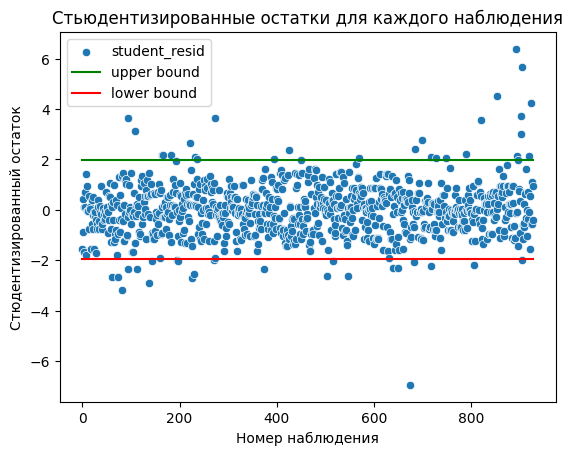

Удалено 10 выбросов. Размер X_filled_clean: (919, 31)


In [599]:
from scipy.stats import t
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_wo_const = X_filled.drop(columns=["const"], errors="ignore")  # если добавляла константу
X_scaled = scaler.fit_transform(X_wo_const)
X_scaled = pd.DataFrame(X_scaled, index=X_filled.index, columns=X_wo_const.columns)

# Теперь добавь константу
X_scaled["const"] = 1
n, k = X_scaled.shape

# Стьюдентизированные остатки
alpha = 0.05
dfree = n - k  # n и k уже определены выше
t_crit = t.ppf(1 - alpha/2, dfree)
print(f"Критические значения: t1 = {-t_crit:.2f}, t2 = {t_crit:.2f}")
st_errors = model_sm.outlier_test()
fig, ax = plt.subplots()
n, k = X_scaled.shape
sns.scatterplot(data=st_errors, x=st_errors.index, y = "student_resid", ax=ax, label="student_resid")
sns.lineplot(x=st_errors.index, y=[1.96]*n, ax=ax, label="upper bound", color="green")
sns.lineplot(x=st_errors.index, y=[-1.96]*n, ax=ax, label="lower bound", color="red")
plt.title("Стьюдентизированные остатки для каждого наблюдения")
plt.xlabel("Номер наблюдения")
plt.ylabel("Стюдентизированный остаток")
plt.show()
outliers_test_1 = st_errors[(st_errors["student_resid"] >= 1.96) | (st_errors["student_resid"] <= -1.96)][["student_resid"]]
outliers_test_1["index"] = outliers_test_1.index
outliers_test_1 = outliers_test_1[["student_resid", "index"]]
# outliers_test_1
# Левериндж
X = X_scaled.to_numpy()
XTX_inv = np.linalg.inv(X.T @ X) # обратная матрица X'X
leverage = np.diag(X @ XTX_inv @ X.T) # диагональные элементы - точки левериджа

# Создадим DataFrame linreg_data с нужными столбцами
linreg_data = X_scaled.copy()
linreg_data["leverage"] = leverage
linreg_data["index"] = linreg_data.index
linreg_data = linreg_data.merge(st_errors[["student_resid"]], left_index=True, right_index=True)
linreg_data["index"] = linreg_data.index  # убедимся, что индекс есть

# Порог для левериджа
const = 2 * k / n

# Найдем выбросы по левериджу
outliers_test_2 = linreg_data[linreg_data["leverage"] > const][["index", "leverage"]]
outliers_test_2
linreg_data["DFFITS"] = linreg_data["student_resid"] * np.sqrt(linreg_data["leverage"] / (1 - linreg_data["leverage"]))

const = 2 * np.sqrt(k / n)

outliers_test_3 = linreg_data[linreg_data["DFFITS"].abs() > const][["index", "DFFITS"]]
# Получаем индексы выбросов по каждому тесту
outlier_idx_1 = set(outliers_test_1['index'])
outlier_idx_2 = set(outliers_test_2['index'])
outlier_idx_3 = set(outliers_test_3['index'])

# Находим пересечение индексов (выбросы по всем трем тестам)
outlier_idx_all = outlier_idx_1 & outlier_idx_2 & outlier_idx_3

# Удаляем эти строки из X_filled
X_filled_clean = X_filled.drop(index=outlier_idx_all)
y_clean = y.drop(index=outlier_idx_all)

print(f"Удалено {len(outlier_idx_all)} выбросов. Размер X_filled_clean: {X_filled_clean.shape}")

In [600]:
X_filled_clean.columns

Index(['const', 'memory', 'height', 'width', 'depth', 'square',
       'video_resolution_v', 'video_resolution_h', 'screen_resolution_h',
       'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight',
       'frame_has_metal', 'frame_has_plastic', 'is_5G', 'year', 'quick_charge',
       'wireless_charging', 'battery', 'brand_Apple', 'brand_Samsung',
       'brand_Infinix', 'zoom', 'main_cams', 'used', 'frameless', 'dop_screen',
       'is_fold', 'size'],
      dtype='object')

In [601]:
model_sm = sm.OLS(y_clean, X_filled_clean).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     506.2
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        16:18:44   Log-Likelihood:                 140.16
No. Observations:                 919   AIC:                            -220.3
Df Residuals:                     889   BIC:                            -75.62
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.9353    

Проверка предпосылок теоремы Гаусса-Маркова:

Несмещенность ошибок

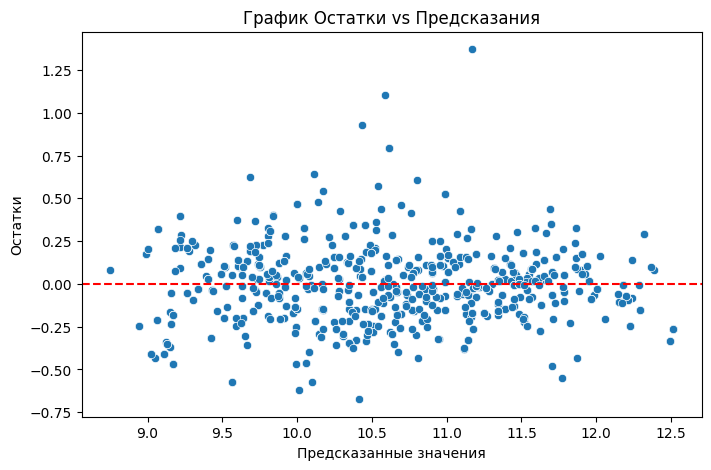

In [602]:
# Получаем предсказания и остатки для модели model_sm
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

Мультиколлинеарность

In [603]:
X_filled_clean.columns

Index(['const', 'memory', 'height', 'width', 'depth', 'square',
       'video_resolution_v', 'video_resolution_h', 'screen_resolution_h',
       'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight',
       'frame_has_metal', 'frame_has_plastic', 'is_5G', 'year', 'quick_charge',
       'wireless_charging', 'battery', 'brand_Apple', 'brand_Samsung',
       'brand_Infinix', 'zoom', 'main_cams', 'used', 'frameless', 'dop_screen',
       'is_fold', 'size'],
      dtype='object')

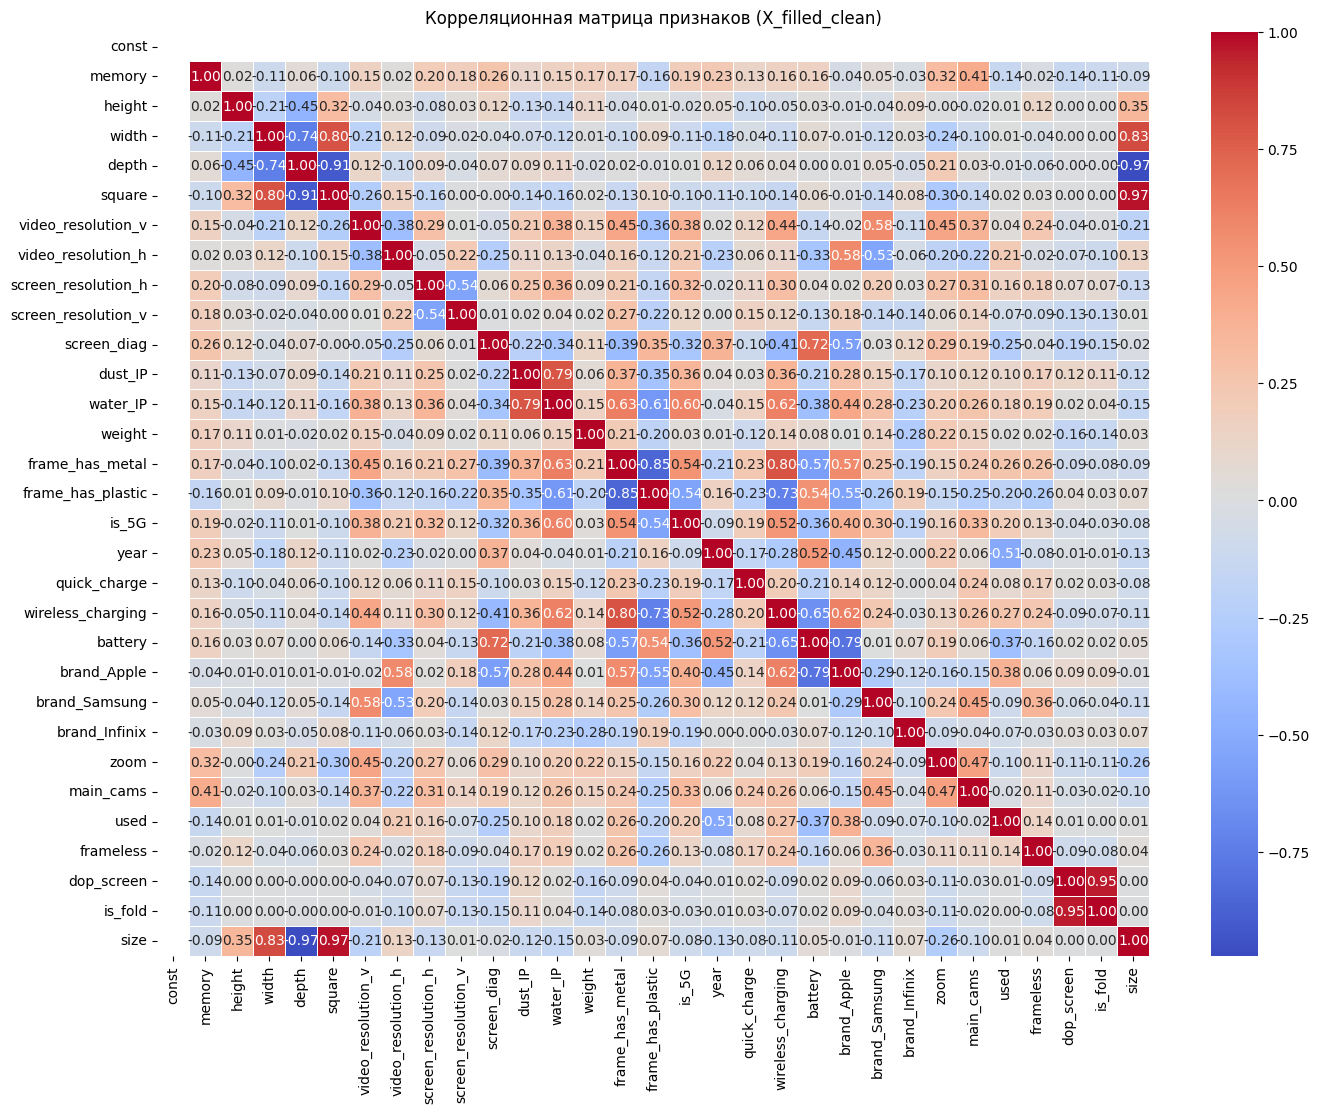

In [604]:
corr_matrix = X_filled_clean.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица признаков (X_filled_clean)")
plt.show()

VIF

In [605]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Исключаем константу перед расчётом VIF
X_vif = X_filled_clean.drop(columns=['const'])

# Обновим масштабирование (если нужно), но если ты недавно это делал, можно пропустить
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)

# Добавим константу, как требует statsmodels
X_scaled = sm.add_constant(X_scaled)

# Рассчитаем VIF для всех признаков, включая const
vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# Отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)


                feature        VIF
0                  size        inf
1                height        inf
2                 width        inf
3                 depth        inf
4                square        inf
5            dop_screen  13.340533
6               is_fold  12.548840
7           brand_Apple   8.230158
8               battery   6.454949
9       frame_has_metal   6.249591
10             water_IP   6.126783
11    wireless_charging   5.125762
12    frame_has_plastic   4.463493
13          screen_diag   3.631587
14  screen_resolution_h   3.450826
15              dust_IP   3.382561
16        brand_Samsung   3.325701
17  screen_resolution_v   3.064597
18   video_resolution_h   2.814880
19                is_5G   2.593659
20   video_resolution_v   2.528439
21            main_cams   2.340440
22                 year   2.066999
23                 zoom   1.913533
24               weight   1.578282
25               memory   1.563459
26                 used   1.544724
27            framel

In [606]:
X_filled_clean2 = X_filled_clean.drop(columns=['depth', 'square', 'is_fold'])
# X_filled_clean2['P/2'] = X_filled_clean2['height'] + X_filled_clean2['width'] 
X_filled_clean2 = X_filled_clean2.drop(columns=['height', 'width'])
model_sm = sm.OLS(y_clean, X_filled_clean2).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     519.7
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        16:18:59   Log-Likelihood:                 85.465
No. Observations:                 919   AIC:                            -118.9
Df Residuals:                     893   BIC:                             6.476
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -211.5134    

In [607]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Исключаем константу перед расчётом VIF
X_vif = X_filled_clean2.drop(columns=['const'])

# Обновим масштабирование (если нужно), но если ты недавно это делал, можно пропустить
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)

# Добавим константу, как требует statsmodels
X_scaled = sm.add_constant(X_scaled)

# Рассчитаем VIF для всех признаков, включая const
vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# Отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)

                feature       VIF
0           brand_Apple  7.058585
1       frame_has_metal  6.150352
2               battery  6.106730
3              water_IP  5.755077
4     wireless_charging  4.994112
5     frame_has_plastic  4.452458
6   screen_resolution_h  3.345705
7         brand_Samsung  3.292140
8               dust_IP  3.240767
9   screen_resolution_v  3.015805
10          screen_diag  2.912246
11   video_resolution_h  2.778536
12                is_5G  2.531252
13   video_resolution_v  2.466910
14            main_cams  2.293834
15                 year  1.949329
16                 zoom  1.823913
17               memory  1.545395
18                 used  1.531316
19           dop_screen  1.432583
20            frameless  1.409747
21               weight  1.371324
22        brand_Infinix  1.296742
23         quick_charge  1.271066
24                 size  1.190591
25                const  1.000000


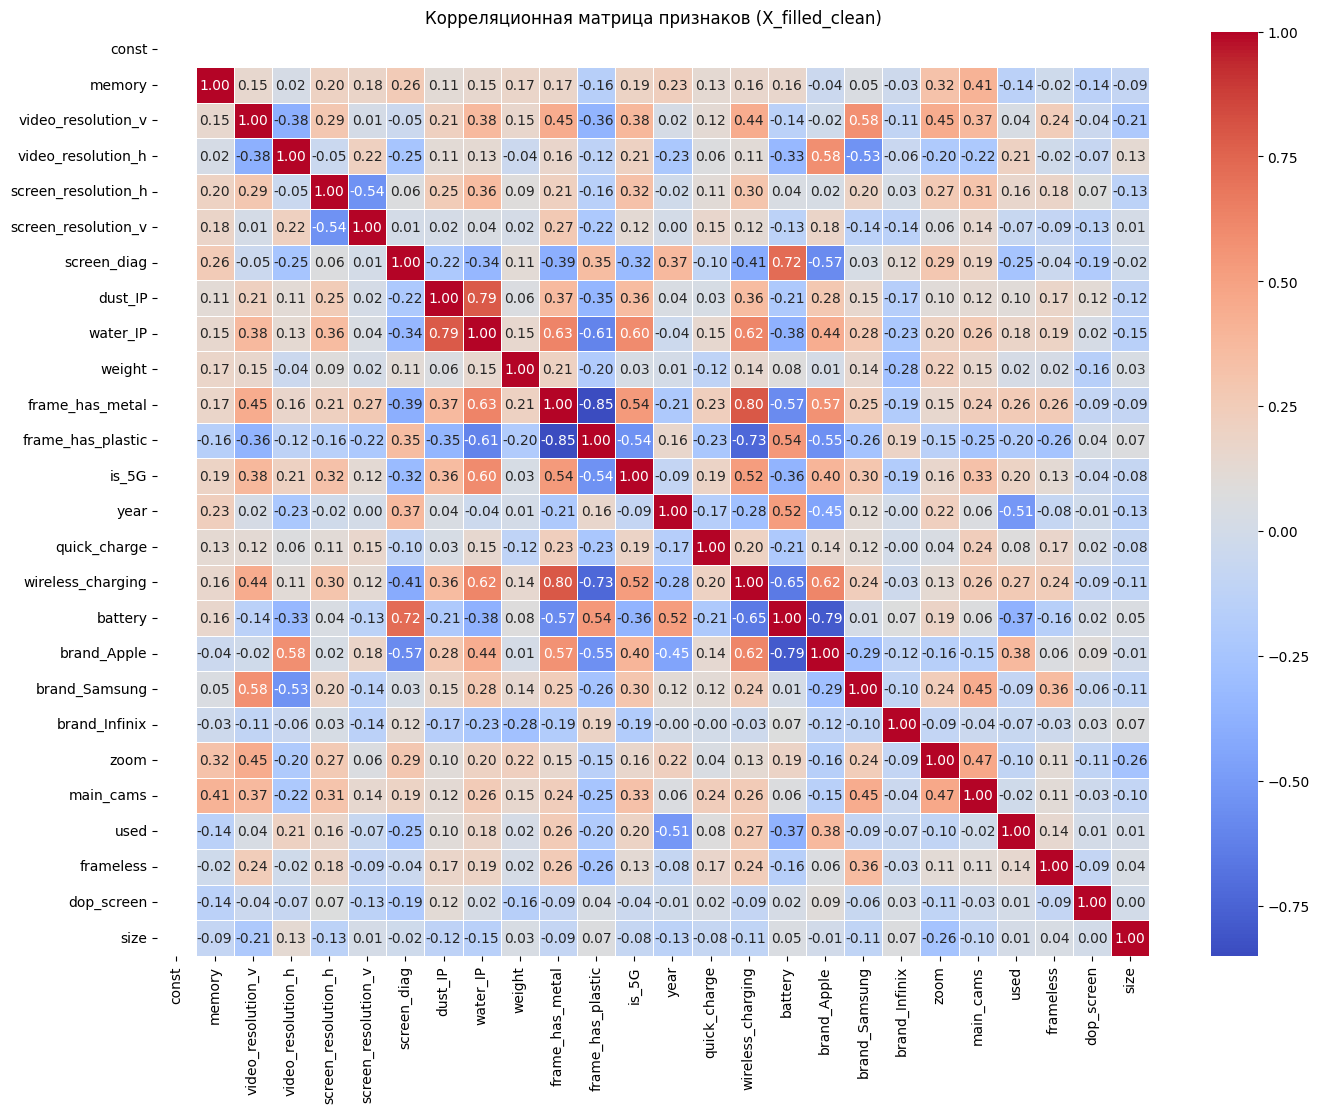

In [608]:
corr_matrix = X_filled_clean2.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица признаков (X_filled_clean)")
plt.show()

Гетероскедантичность

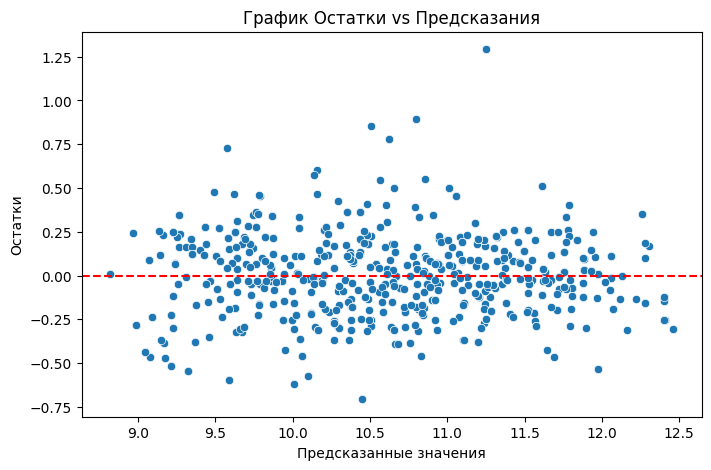

In [609]:
# Получаем предсказания и остатки для модели model_sm
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

In [610]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.Series([variance_inflation_factor(X_filled_clean2.values, i) for i in range(X_filled_clean2.shape[1])],
               index=X_filled_clean2.columns)
print(vif)

const                  9.418203e+06
memory                 1.545395e+00
video_resolution_v     2.466910e+00
video_resolution_h     2.778536e+00
screen_resolution_h    3.345705e+00
screen_resolution_v    3.015805e+00
screen_diag            2.912246e+00
dust_IP                3.240767e+00
water_IP               5.755077e+00
weight                 1.371324e+00
frame_has_metal        6.150352e+00
frame_has_plastic      4.452458e+00
is_5G                  2.531252e+00
year                   1.949329e+00
quick_charge           1.271066e+00
wireless_charging      4.994112e+00
battery                6.106730e+00
brand_Apple            7.058585e+00
brand_Samsung          3.292140e+00
brand_Infinix          1.296742e+00
zoom                   1.823913e+00
main_cams              2.293834e+00
used                   1.531316e+00
frameless              1.409747e+00
dop_screen             1.432583e+00
size                   1.190591e+00
dtype: float64


In [611]:
corr_matrix = X_filled_clean2.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_filled_clean3 = X_filled_clean2.drop(columns=to_drop)


In [612]:
from statsmodels.stats.diagnostic import het_white

# Тест Уайта на гетероскедастичность
# residuals и X_filled_clean уже определены выше
white_test = het_white(residuals, X_filled_clean2)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
for name, value in zip(labels, white_test):
    print(f"{name}: {value:.4f}")

Test Statistic: 599.9027
Test Statistic p-value: 0.0000
F-Statistic: 3.7600
F-Test p-value: 0.0000


Функциональная форма - тесты Глейзера

In [613]:
from statsmodels.formula.api import ols

# Для теста Глейзера: регрессируем абсолютные остатки на каждый признак и его логарифм
glazer_results = []

# Создадим копию с переименованием столбцов, чтобы имена были валидными для patsy
X_filled_clean_safe = X_filled_clean2.rename(columns=lambda x: x.replace('/', '_') if '/' in x else x)

for feature in X_filled_clean_safe.columns:
    if feature == 'const':
        continue
    abs_resid = np.abs(residuals)
    # Проверяем, есть ли отрицательные значения (для логарифма)
    if (X_filled_clean_safe[feature] > 0).all():
        X_feat = X_filled_clean_safe[feature]
        X_feat_log = np.log(X_feat)
        df_glazer = pd.DataFrame({
            'abs_resid': abs_resid,
            feature: X_feat,
            f'log_{feature}': X_feat_log
        })
        model = ols(f'abs_resid ~ {feature} + log_{feature}', data=df_glazer).fit()
    else:
        X_feat = X_filled_clean_safe[feature]
        df_glazer = pd.DataFrame({
            'abs_resid': abs_resid,
            feature: X_feat
        })
        model = ols(f'abs_resid ~ {feature}', data=df_glazer).fit()
    pvalues = model.pvalues
    glazer_results.append({
        'feature': feature,
        'pval_linear': pvalues[1] if len(pvalues) > 1 else np.nan,
        'pval_log': pvalues[2] if len(pvalues) > 2 else np.nan
    })

glazer_df = pd.DataFrame(glazer_results)
print(glazer_df)

                feature   pval_linear  pval_log
0                memory  3.008561e-03  0.000535
1    video_resolution_v  2.116422e-01  0.029065
2    video_resolution_h  1.587496e-04  0.001767
3   screen_resolution_h  2.025980e-01  0.513777
4   screen_resolution_v  5.092513e-04  0.000005
5           screen_diag  3.239307e-03  0.002214
6               dust_IP  9.196258e-07       NaN
7              water_IP  1.773887e-06       NaN
8                weight  9.859013e-01  0.105551
9       frame_has_metal  3.049818e-06       NaN
10    frame_has_plastic  5.309036e-05       NaN
11                is_5G  4.717036e-07       NaN
12                 year  4.229841e-01  0.423656
13         quick_charge  4.133994e-09       NaN
14    wireless_charging  2.235267e-08       NaN
15              battery  4.365578e-01  0.799237
16          brand_Apple  7.507617e-08       NaN
17        brand_Samsung  2.244280e-01       NaN
18        brand_Infinix  3.837314e-03       NaN
19                 zoom  8.408303e-01  0

In [614]:
model_sm = sm.OLS(y_clean, X_filled_clean2).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     635.7
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        16:19:20   Log-Likelihood:                 85.465
No. Observations:                 919   AIC:                            -118.9
Df Residuals:                     893   BIC:                             6.476
Df Model:                          25                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -211.5134    

In [615]:
# Вывести признаки и их p-value
pvalues = model_sm.pvalues
print("Признак\t\tp-value")
for feature_name, pval in pvalues.items():
    print(f"{feature_name:20s} {pval:.4f}")

# Оставить только значимые на 5% уровне признаки (p-value < 0.05)
significant_features = pvalues[pvalues < 0.05].index.tolist()
print("\nЗначимые признаки на 5% уровне значимости:")
print(significant_features)

# Если хотим получить новый датафрейм только с этими признаками:
X_significant = X_filled_clean2[significant_features]

Признак		p-value
const                0.0000
memory               0.0000
video_resolution_v   0.0000
video_resolution_h   0.3973
screen_resolution_h  0.0000
screen_resolution_v  0.0000
screen_diag          0.0000
dust_IP              0.0765
water_IP             0.4045
weight               0.3536
frame_has_metal      0.7758
frame_has_plastic    0.0000
is_5G                0.0000
year                 0.0000
quick_charge         0.0073
wireless_charging    0.0000
battery              0.0000
brand_Apple          0.0000
brand_Samsung        0.0002
brand_Infinix        0.3578
zoom                 0.0267
main_cams            0.0000
used                 0.0000
frameless            0.0228
dop_screen           0.0000
size                 0.8890

Значимые признаки на 5% уровне значимости:
['const', 'memory', 'video_resolution_v', 'screen_resolution_h', 'screen_resolution_v', 'screen_diag', 'frame_has_plastic', 'is_5G', 'year', 'quick_charge', 'wireless_charging', 'battery', 'brand_Apple', 'brand_

In [616]:
X_filled_clean2['IP'] = X_filled_clean2['dust_IP'] + X_filled_clean2['water_IP']
X_filled_clean2 = X_filled_clean2.drop(columns=['dust_IP', 'water_IP', 'battery', 'screen_diag', 'quick_charge', 'zoom'])
model_sm = sm.OLS(y_clean, X_filled_clean2).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     733.4
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        16:19:26   Log-Likelihood:                 46.688
No. Observations:                 919   AIC:                            -51.38
Df Residuals:                     898   BIC:                             49.91
Df Model:                          20                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -230.7961    

In [617]:
pvalues = model_sm.pvalues
print("Признак\t\tp-value")
for feature_name, pval in pvalues.items():
    print(f"{feature_name:20s} {pval:.4f}")

# Оставить только значимые на 5% уровне признаки (p-value < 0.05)
significant_features = pvalues[pvalues < 0.05].index.tolist()

Признак		p-value
const                0.0000
memory               0.0000
video_resolution_v   0.0000
video_resolution_h   0.2761
screen_resolution_h  0.0000
screen_resolution_v  0.0000
weight               0.1247
frame_has_metal      0.9371
frame_has_plastic    0.0000
is_5G                0.0000
year                 0.0000
wireless_charging    0.0000
brand_Apple          0.0000
brand_Samsung        0.0118
brand_Infinix        0.1488
main_cams            0.0000
used                 0.0000
frameless            0.0245
dop_screen           0.0000
size                 0.9137
IP                   0.0001


Функциональная форма:

In [618]:
from statsmodels.stats.diagnostic import linear_reset
reset_test = linear_reset(model_sm, power=2, use_f=True)
print(reset_test)

<F test: F=21.979940692195278, p=3.1831175190374937e-06, df_denom=897, df_num=1>


In [619]:
# X_filled_clean2['is_5G_year'] = X_filled_clean2['is_5G'] * X_filled_clean2['year']
X_filled_clean2['brand_Apple_memory'] = X_filled_clean2['brand_Apple'] * X_filled_clean2['memory']
model_sm = sm.OLS(y_clean, X_filled_clean2).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     705.7
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        16:19:34   Log-Likelihood:                 48.746
No. Observations:                 919   AIC:                            -53.49
Df Residuals:                     897   BIC:                             52.62
Df Model:                          21                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -232.9696    

In [620]:
pvalues = model_sm.pvalues
print("Признак\t\tp-value")
for feature_name, pval in pvalues.items():
    print(f"{feature_name:20s} {pval:.4f}")

# Оставить только значимые на 5% уровне признаки (p-value < 0.05)
significant_features = pvalues[pvalues < 0.05].index.tolist()

Признак		p-value
const                0.0000
memory               0.0000
video_resolution_v   0.0000
video_resolution_h   0.3163
screen_resolution_h  0.0000
screen_resolution_v  0.0000
weight               0.1865
frame_has_metal      0.9307
frame_has_plastic    0.0000
is_5G                0.0000
year                 0.0000
wireless_charging    0.0000
brand_Apple          0.0000
brand_Samsung        0.0056
brand_Infinix        0.1363
main_cams            0.0000
used                 0.0000
frameless            0.0366
dop_screen           0.0000
size                 0.7430
IP                   0.0001
brand_Apple_memory   0.0646


In [627]:
import pandas as pd # работа с таблицами
from sklearn.decomposition import PCA # функция PCA, вычисляющая главные компоненты
from sklearn.preprocessing import StandardScaler # стандартизация признаков

columns_to_use = ['video_resolution_v', 'video_resolution_h']
data_subset = X_filled_clean2[columns_to_use]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)
pca_model = PCA(n_components=1)
principalComponents = pca_model.fit_transform(scaled_data)
principaldata_video_res = pd.DataFrame(data = principalComponents, columns = ['video_res'])


columns_to_use = ['screen_resolution_v', 'screen_resolution_h']
data_subset = X_filled_clean2[columns_to_use]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)
pca_model = PCA(n_components=1)
principalComponents = pca_model.fit_transform(scaled_data)
principaldata_screen_res = pd.DataFrame(data = principalComponents, columns = ['screen_res'])
# principaldata_video_res, principaldata_screen_res

(     video_res
 0     0.727324
 1     0.727324
 2     0.727324
 3     0.727324
 4     0.106284
 ..         ...
 914   0.727324
 915   0.727324
 916  -3.323538
 917   0.727324
 918   0.727324
 
 [919 rows x 1 columns],
      screen_res
 0     -0.660341
 1     -0.770934
 2     -0.877830
 3      2.422683
 4      2.292052
 ..          ...
 914    2.373005
 915   -0.711266
 916   -0.952100
 917   -0.788079
 918   -0.792776
 
 [919 rows x 1 columns])

# Final Data (at least I hope so...)

In [628]:
X_filled_clean3 = X_filled_clean2.drop(columns=['dop_screen', 
                                                'video_resolution_v', 'video_resolution_h',
                                                'screen_resolution_v', 'screen_resolution_h',
                                                'IP', 'memory',
                                          'weight', 'frameless', 'main_cams'])
X_filled_clean3['memory_sq'] = X_filled_clean2['memory']**2
X_filled_clean3['IP_sq'] = X_filled_clean2['IP']**2
X_filled_clean3['weight_sq'] = (X_filled_clean2['weight'] - X_filled_clean2['weight'].mean())**2
X_filled_clean3['size_memory'] = X_filled_clean2['size'] * X_filled_clean2['memory']
X_filled_clean3['frameless_year'] = X_filled_clean2['frameless'] * X_filled_clean2['year']
X_filled_clean3['video_res'] = principaldata_video_res['video_res'].values
X_filled_clean3['screen_res'] = principaldata_screen_res['screen_res'].values
X_filled_clean3['main_cams_year'] = X_filled_clean2['main_cams'] * X_filled_clean2['year']

X_filled_clean3['memory_log'] = np.log2(X_filled_clean2['memory'])

model_sm = sm.OLS(y_clean, X_filled_clean3).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     714.7
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        16:22:36   Log-Likelihood:                -51.200
No. Observations:                 919   AIC:                             144.4
Df Residuals:                     898   BIC:                             245.7
Df Model:                          20                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -200.0262     27

In [629]:
pvalues = model_sm.pvalues
print("Признак\t\tp-value")
for feature_name, pval in pvalues.items():
    print(f"{feature_name:20s} {pval:.4f}")

# Оставить только значимые на 5% уровне признаки (p-value < 0.05)
significant_features = pvalues[pvalues < 0.05].index.tolist()

Признак		p-value
const                0.0000
frame_has_metal      0.0004
frame_has_plastic    0.0009
is_5G                0.0000
year                 0.0000
wireless_charging    0.0000
brand_Apple          0.0000
brand_Samsung        0.1956
brand_Infinix        0.0002
used                 0.0000
size                 0.0349
brand_Apple_memory   0.0117
memory_sq            0.8362
IP_sq                0.0212
weight_sq            0.4532
size_memory          0.1365
frameless_year       0.0010
video_res            0.7591
screen_res           0.1300
main_cams_year       0.0000
memory_log           0.0000


In [630]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Исключаем константу перед расчётом VIF
X_vif = X_filled_clean3.drop(columns=['const'])

# Обновим масштабирование (если нужно), но если ты недавно это делал, можно пропустить
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)

# Добавим константу, как требует statsmodels
X_scaled = sm.add_constant(X_scaled)

# Рассчитаем VIF для всех признаков, включая const
vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# Отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)

               feature       VIF
0          brand_Apple  9.016515
1      frame_has_metal  5.235829
2   brand_Apple_memory  4.877066
3            memory_sq  4.809082
4    wireless_charging  4.466686
5    frame_has_plastic  4.116426
6          size_memory  3.949552
7           memory_log  3.836975
8                 size  3.431483
9        brand_Samsung  3.004725
10               IP_sq  2.641237
11           video_res  2.415276
12               is_5G  2.153003
13                year  1.827538
14      main_cams_year  1.782426
15                used  1.528384
16      frameless_year  1.310140
17       brand_Infinix  1.282032
18          screen_res  1.257781
19           weight_sq  1.113505
20               const  1.000000


In [631]:
from statsmodels.stats.diagnostic import linear_reset
reset_test = linear_reset(model_sm, power=2, use_f=True)
print(reset_test)

<F test: F=0.3529571251560172, p=0.5525937260409601, df_denom=897, df_num=1>


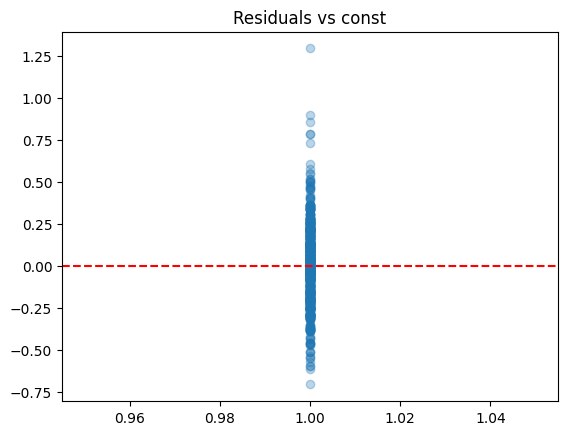

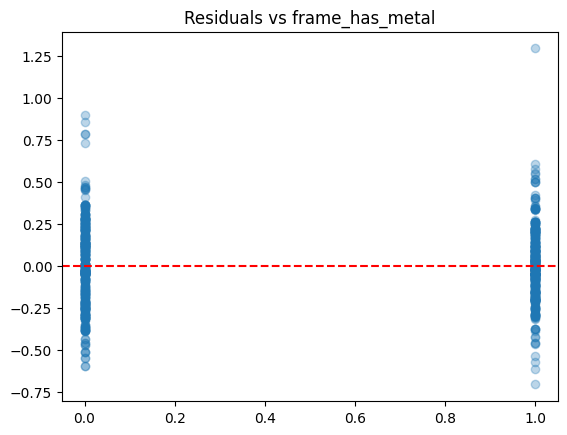

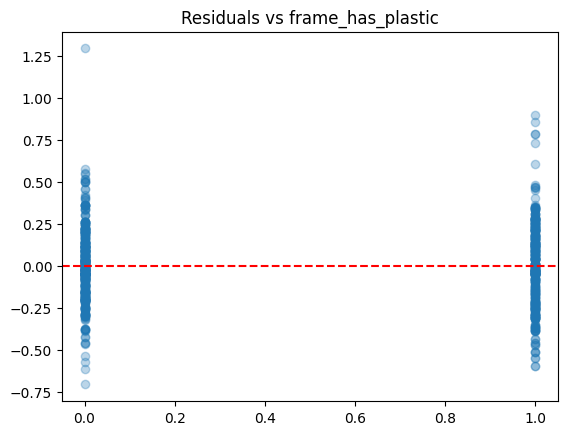

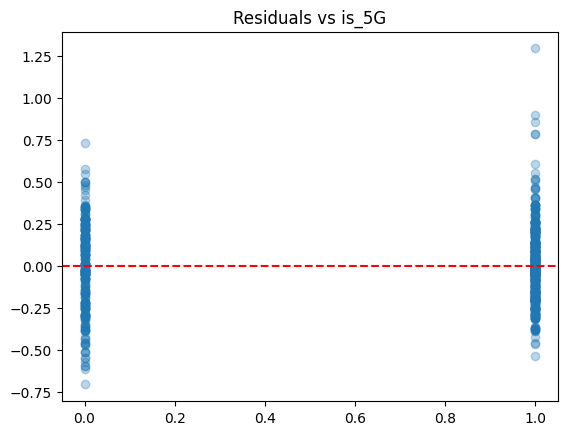

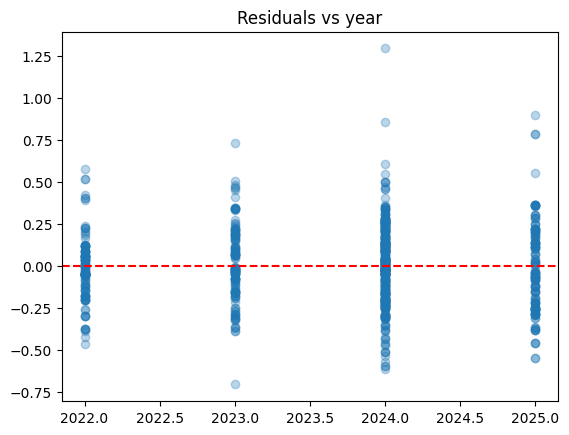

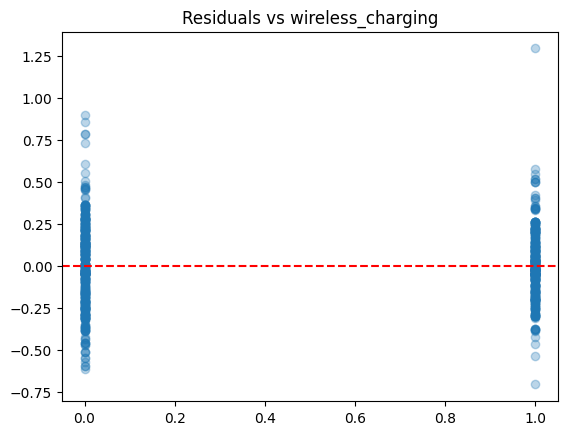

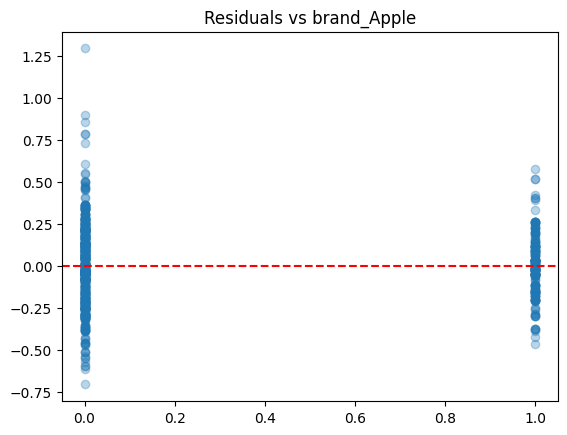

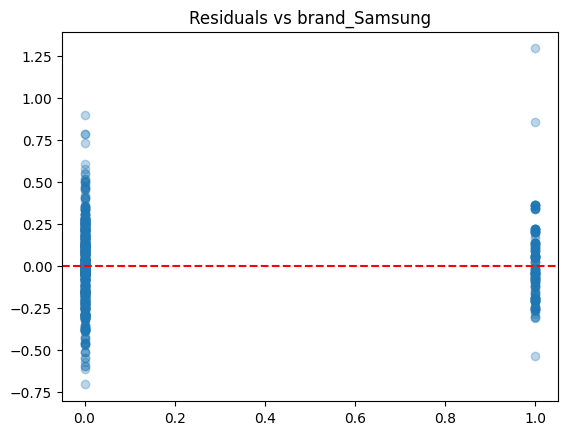

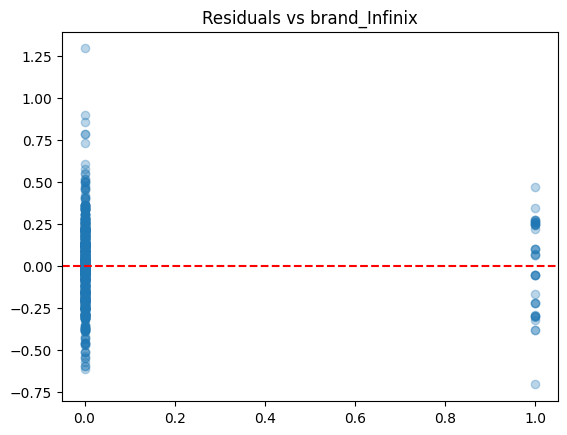

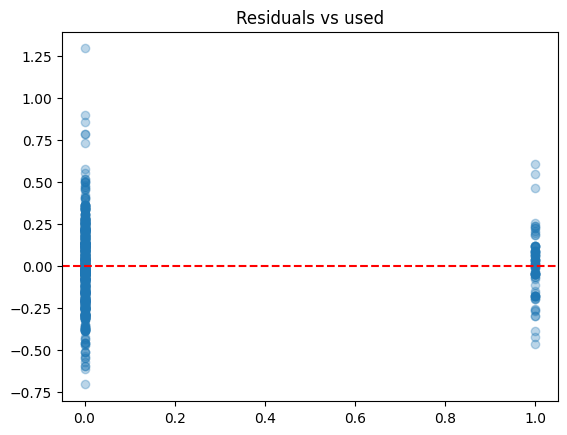

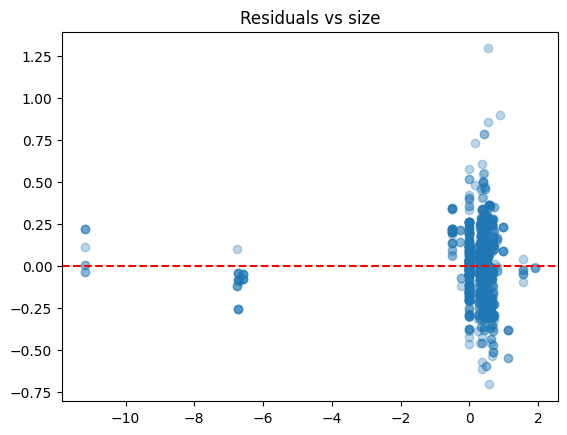

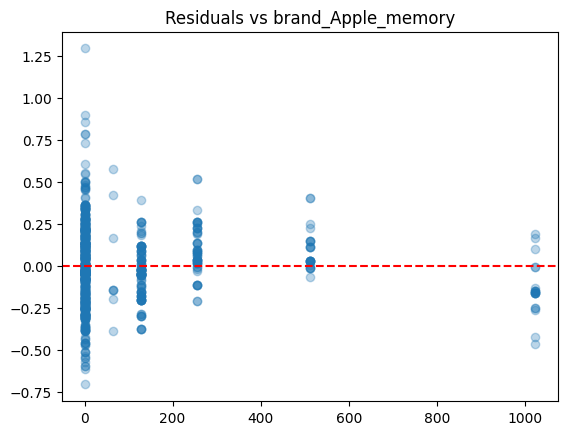

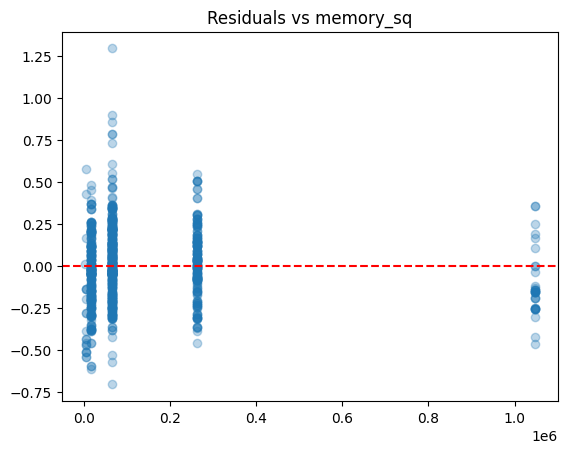

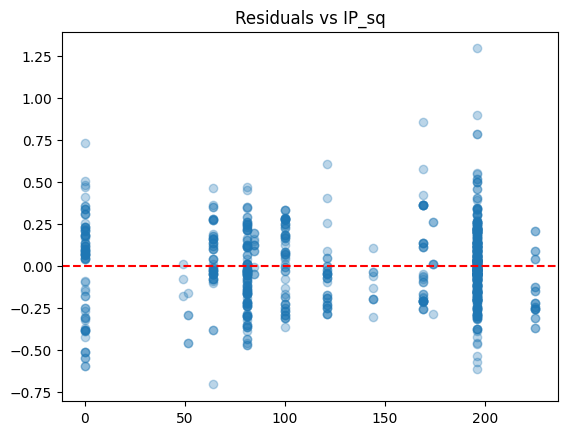

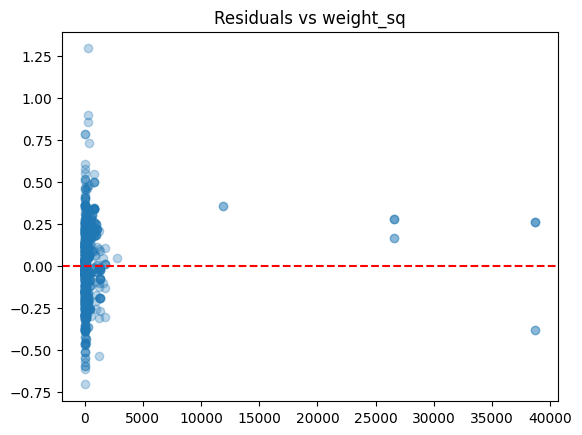

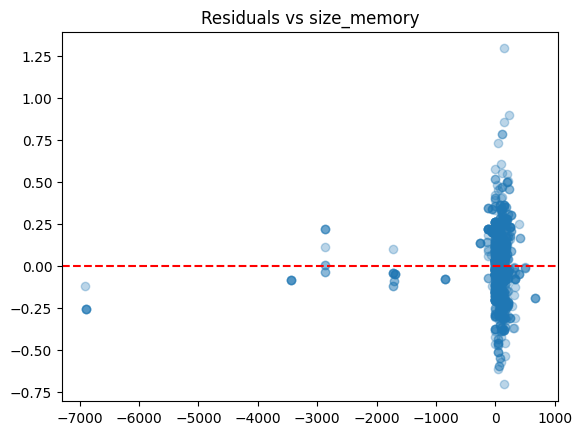

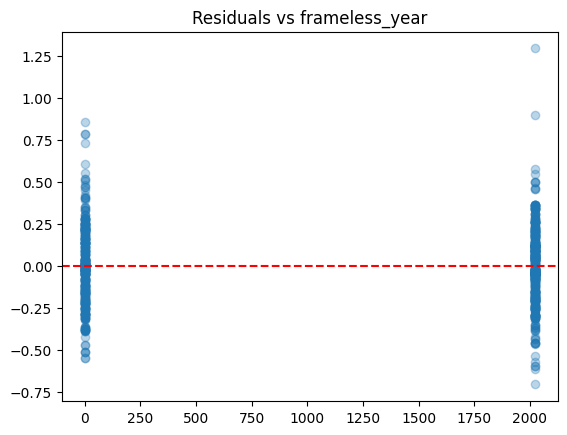

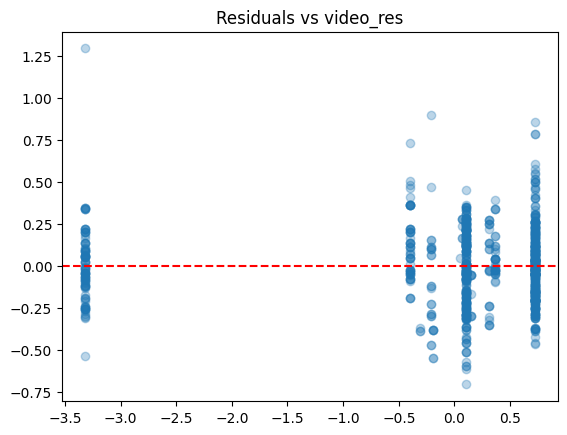

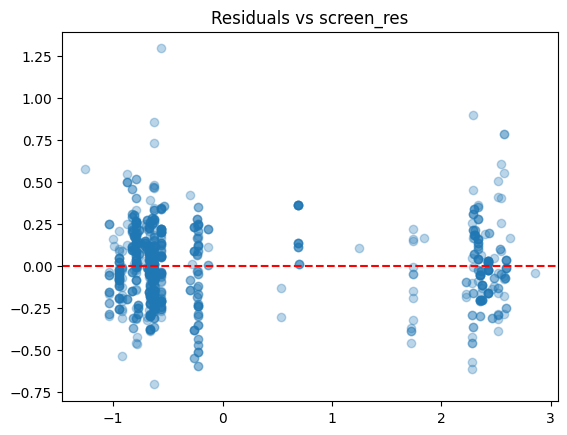

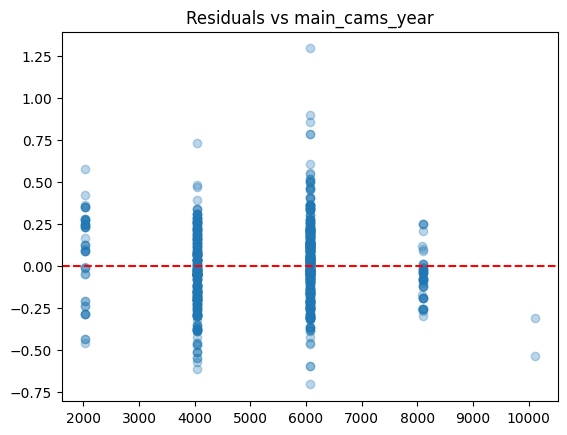

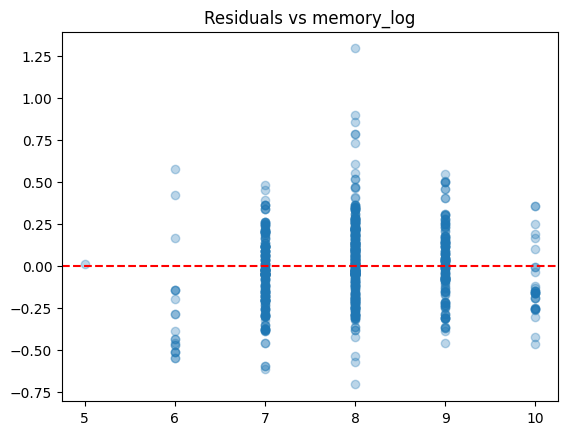

In [632]:
import matplotlib.pyplot as plt

for col in X_filled_clean3.columns:
    plt.scatter(X_filled_clean3[col], residuals, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Residuals vs {col}")
    plt.show()


# Попробуем другую модель

In [640]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

phone_df = pd.concat([y_clean, X_filled_clean3], axis=1)
features = ' + '.join(X_filled_clean3.columns)


quant_model = smf.quantreg('salePrice ~ ' + features, data=phone_df)
quant_results = quant_model.fit(q=0.5)
print(quant_results.summary())


                         QuantReg Regression Results                          
Dep. Variable:              salePrice   Pseudo R-squared:               0.4946
Model:                       QuantReg   Bandwidth:                      0.2205
Method:                 Least Squares   Sparsity:                        1.064
Date:                Wed, 07 May 2025   No. Observations:                  919
Time:                        12:27:17   Df Residuals:                      898
                                        Df Model:                           20
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.759e-06   7.38e-05     -0.037      0.970      -0.000       0.000
const              -2.759e-06   7.38e-05     -0.037      0.970      -0.000       0.000
frame_has_metal        0.0012      0.080      0.015      0.988      -0.156       0.159
frame_has_pl

In [641]:
from sklearn.metrics import mean_squared_error
# Для OLS
ols_predictions = model_sm.predict(X_filled_clean3)
ols_rmse = np.sqrt(mean_squared_error(y_clean, ols_predictions))

# Для квантильной регрессии
quant_predictions = quant_results.predict(X_filled_clean3)
quant_rmse = np.sqrt(mean_squared_error(y_clean, quant_predictions))


# Сравнение
print(f"OLS RMSE: {ols_rmse}")
print(f"Quantile RMSE: {quant_rmse}")

OLS RMSE: 0.2558342324291968
Quantile RMSE: 0.4918332601218037


In [646]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Предположим, у нас есть DataFrame phones_df с колонками price, feature1, feature2

# 1. Категоризация цен (например, на 3 категории: низкие, средние, высокие)
phone_df['price_cat'] = pd.qcut(phone_df['salePrice'], q=3, labels=['low', 'medium', 'high'])

# 2. Создание dummy-переменных для категорий
phones_df = pd.get_dummies(phone_df, columns=['price_cat'], drop_first=True)

# 3. Построение модели упорядоченного выбора (Ordered Probit/Logit)
from statsmodels.discrete.discrete_model import OrderedModel

# Преобразуем категориальную переменную в числовой формат
phones_df['price_cat_num'] = phones_df['price_cat'].cat.codes

# Создаем модель
ordered_model = OrderedModel(phones_df['price_cat_num'], 
                            phones_df[['feature1', 'feature2']],
                            distr='logit')
ordered_results = ordered_model.fit()
print(ordered_results.summary())


ImportError: cannot import name 'OrderedModel' from 'statsmodels.discrete.discrete_model' (/Users/naburkova/Library/Python/3.9/lib/python/site-packages/statsmodels/discrete/discrete_model.py)